In [7]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from pandas import *
import pandas as pd

In [8]:
measurements = pd.read_csv('NBAMeasurements/RawData/NBAData.csv')
measurements

,name,pos,hand len,hand wid,ht,wt,wingspan
0,Precious Achiuwa,PF,9.00,10.00,79.5,234.0,84.75
1,Ty-Shon Alexander,SG,8.75,8.75,74.0,200.8,80.00
2,Udoka Azubuike,C,9.25,10.00,82.0,259.5,91.25
3,Tyler Bey,PF,8.50,9.00,78.0,212.8,85.25
4,Yoeli Childs,PF,8.75,10.00,78.0,226.4,83.50
...,...,...,...,...,...,...,...
1080,Zion Williamson,PF,-,-,78.0,284.0,82.00
1081,Markelle Fultz,PG,-,-,75.0,201.0,81.00
1082,Kris Dunn,PG,-,-,75.0,205.0,81.50
1083,Lebron James,SF,9.0,9.25,81.0,250.0,84.00


In [9]:
#get opponent points from score
def oppPts(score):
    dash = score.find('-')
    return int(score[dash+1:])
    

In [10]:
browser = webdriver.Chrome(ChromeDriverManager().install())
url = 'https://www.foxsports.com/nba/philadelphia-76ers-team-game-log?season=2019&category=SCORING&seasonType=1'
browser.get(url)
team_stats = []
#teams in alphatbetical order
teams = ['76ers','Bucks','Bulls','Cavaliers','Celtics','Clippers','Grizzlies','Hawks','Heat','Hornets','Jazz','Kings','Knicks','Lakers','Magic','Mavericks','Nets','Nuggets','Pacers','Pelicans','Pistons','Raptors','Rockets','Spurs','Suns','Thunder','Timberwolves','Trail Blazers','Warriors','Wizards']

for i in range(30):
    element = WebDriverWait(browser, 20).until(EC.presence_of_element_located((By.XPATH, '/html/body/section[1]/div/section[1]/div/div[2]/div[1]/div[2]/div[1]/select')))
    path = '/html/body/section[1]/div/section[1]/div/div[2]/div[1]/div[2]/div[1]/select/option[' + str(i+1) + ']'
    browser.find_element_by_xpath(path).click()
    element = WebDriverWait(browser, 20).until(EC.presence_of_element_located((By.XPATH, '/html/body/section[1]/div/section[2]/div/div[1]/table')))

    table = browser.find_element_by_xpath('/html/body/section[1]/div/section[2]/div/div[1]/table')


    for line_id, lines in enumerate(table.text.split('\n')):
        if line_id != 0 and len(lines.split(' ')) == 15:
            #append an array of a game's stats. Put team name at beginning.
            team_stats.append([teams[i]]+lines.split(' '))

[WDM] - Current google-chrome version is 87.0.4280
[WDM] - Get LATEST driver version for 87.0.4280
[WDM] - Get LATEST driver version for 87.0.4280
 
[WDM] - Trying to download new driver from http://chromedriver.storage.googleapis.com/87.0.4280.88/chromedriver_mac64.zip
[WDM] - Driver has been saved in cache [/Users/victorcai/.wdm/drivers/chromedriver/mac64/87.0.4280.88]


In [26]:
db = pandas.DataFrame({ 'team': [ i[0] for i in team_stats ],
                        'result': [ i[4] for i in team_stats ],
                        'pts': [ i[15] for i in team_stats ],
                        'oppPts': [ oppPts(i[5]) for i in team_stats ],
                        'FGA': [ i[7] for i in team_stats ],
                        'FG%': [ i[8] for i in team_stats ],
                        '3PA': [ i[13] for i in team_stats ],
                        '3P%': [ i[14] for i in team_stats ],
                        }
                        )
#convert the data to proper type
db['pts']=db['pts'].astype('int64')
db['FGA']=db['FGA'].astype('int64')
db['3PA']=db['3PA'].astype('int64')
db['3P%']=db['3P%'].astype('float64')
db['FG%']=db['FG%'].astype('float64')
db['team']=db['team'].astype(str)
db['result']=db['result'].astype(str)

In [94]:
#create list of win pct of teams in alphabetical order
win_pct = []
for i in teams:
    #wins is a series of an individual team's results (W,L)
    wins = db.loc[db.team == i]['result'].reset_index(drop = True)
    count = 0
    for j in range(wins.size):
        if wins[j] == 'W': 
            count += 1
    #count wins and divide by total
    win_pct.append(count / wins.size)
win_pct

[0.589041095890411,
 0.7671232876712328,
 0.3384615384615385,
 0.2923076923076923,
 0.6666666666666666,
 0.6805555555555556,
 0.4657534246575342,
 0.29850746268656714,
 0.6027397260273972,
 0.35384615384615387,
 0.6111111111111112,
 0.4305555555555556,
 0.3181818181818182,
 0.7323943661971831,
 0.4520547945205479,
 0.5733333333333334,
 0.4861111111111111,
 0.6301369863013698,
 0.6164383561643836,
 0.4166666666666667,
 0.30303030303030304,
 0.7361111111111112,
 0.6111111111111112,
 0.4507042253521127,
 0.4657534246575342,
 0.6111111111111112,
 0.296875,
 0.47297297297297297,
 0.23076923076923078,
 0.3472222222222222]

In [95]:
#win_df is dataframe w 1 row (win pct). Each column is a diff team. 
win_df = pd.DataFrame([win_pct], columns = teams)
# sorts values then returns indices. We want the teams sorted so that when we make graphs, 
# they're organized by wins. We want to see how their performance affects winning.
sorted_index = win_df.iloc[0].sort_values().index
sorted_index

Index(['Warriors', 'Cavaliers', 'Timberwolves', 'Hawks', 'Pistons', 'Knicks',
       'Bulls', 'Wizards', 'Hornets', 'Pelicans', 'Kings', 'Spurs', 'Magic',
       'Grizzlies', 'Suns', 'Trail Blazers', 'Nets', 'Mavericks', '76ers',
       'Heat', 'Jazz', 'Rockets', 'Thunder', 'Pacers', 'Nuggets', 'Celtics',
       'Clippers', 'Lakers', 'Raptors', 'Bucks'],
      dtype='object')

In [100]:
#3P%. tp_pct_df is a dataframe where each column is a team's 3P% in each of its games
tp_pct_df = pd.DataFrame()
for i in teams:
    #column is a series of an individual team's 3P% in each of its games
    column = db.loc[db.team == i]['3P%'].reset_index(drop = True)
    #add is a dataframe consisting of one column
    add = pd.DataFrame({i: column})
    #now concatenate add to the dataframe, axis = 1 to add columnwise
    tp_pct_df = pd.concat([tp_pct_df, add], axis = 1)

#sorted version to be used for violin plot
tp_pct_df_sorted = tp_pct_df[sorted_index]

#returns a Series of each team's mean 3P%, the indices are teams
means = tp_pct_df.mean()
win_pct = pd.Series(win_pct)
#temp is a dataframe with team, 3P%, and win pct. Reset means index so it matches with win_pct
temp = pd.concat([means.reset_index(), win_pct], axis = 1)
#rename columns
temp.columns = ['team', '3P%', 'win%']
temp.plot.scatter(x='3P%',y='win%',title='3P% vs win%')

0     0.589041
1     0.767123
2     0.338462
3     0.292308
4     0.666667
5     0.680556
6     0.465753
7     0.298507
8     0.602740
9     0.353846
10    0.611111
11    0.430556
12    0.318182
13    0.732394
14    0.452055
15    0.573333
16    0.486111
17    0.630137
18    0.616438
19    0.416667
20    0.303030
21    0.736111
22    0.611111
23    0.450704
24    0.465753
25    0.611111
26    0.296875
27    0.472973
28    0.230769
29    0.347222
dtype: float64


-0.1033102940782935


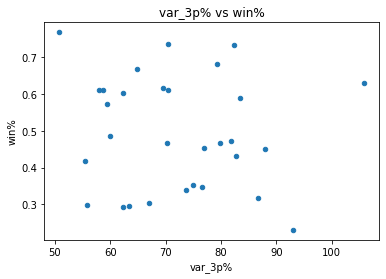

In [114]:
#what we did with the means, this time with variance
var = tp_pct_df.var()
temp = pd.concat([var.reset_index(), win_pct], axis = 1)
temp.columns = ['team', 'var_3p%', 'win%']
temp.plot.scatter(x='var_3p%',y='win%',title='var_3p% vs win%')
#correlation of variance of 3 pointers with win pct
print(temp['var_3p%'].corr(temp['win%']))

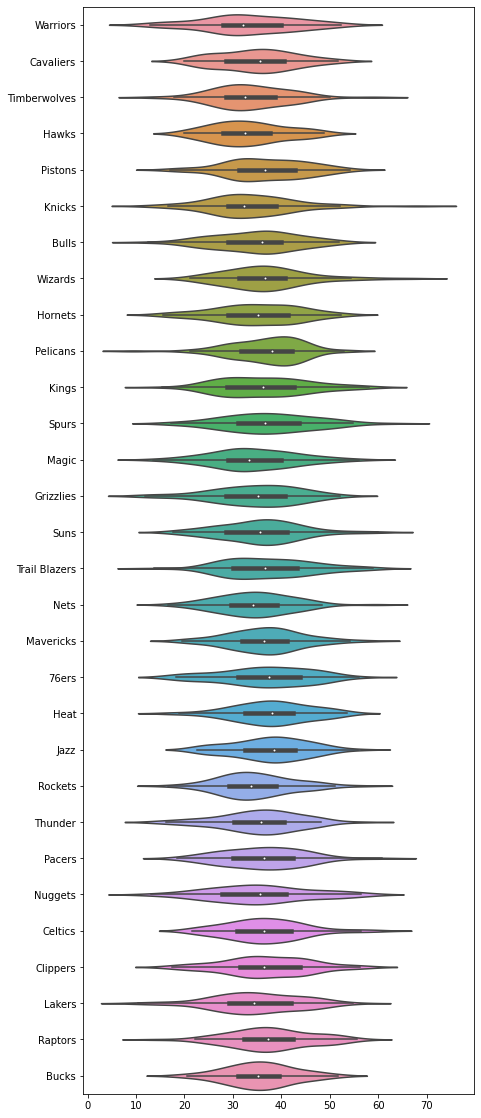

In [77]:
import seaborn
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize = (7, 20))
#violin plot
graph = seaborn.violinplot(data = tp_pct_df_sorted, orient = 'h')

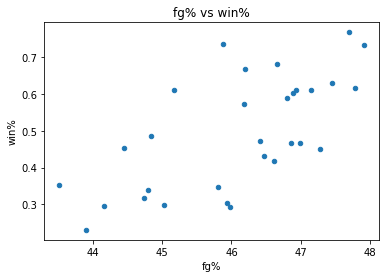

In [80]:
#what we did before, this time with fg%
fg_pct_df = pd.DataFrame()
for i in teams:
    column = db.loc[db.team == i]['FG%'].reset_index(drop = True)
    add = pd.DataFrame({i: column})
    fg_pct_df = pd.concat([fg_pct_df, add], axis = 1)
fg_pct_df_sorted = fg_pct_df[sorted_index]
means = fg_pct_df.mean()

temp = pd.concat([means.reset_index(), win_pct], axis = 1)
temp.columns = ['team', 'fg%', 'win%']
temp.plot.scatter(x='fg%',y='win%',title='fg% vs win%')

0.14094148847221677


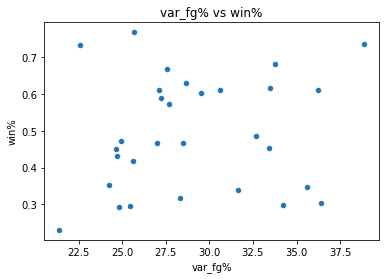

In [113]:
var = fg_pct_df.var()
temp = pd.concat([var.reset_index(), win_pct], axis = 1)
temp.columns = ['team', 'var_fg%', 'win%']
temp.plot.scatter(x='var_fg%',y='win%',title='var_fg% vs win%')
print(temp['var_fg%'].corr(temp['win%']))

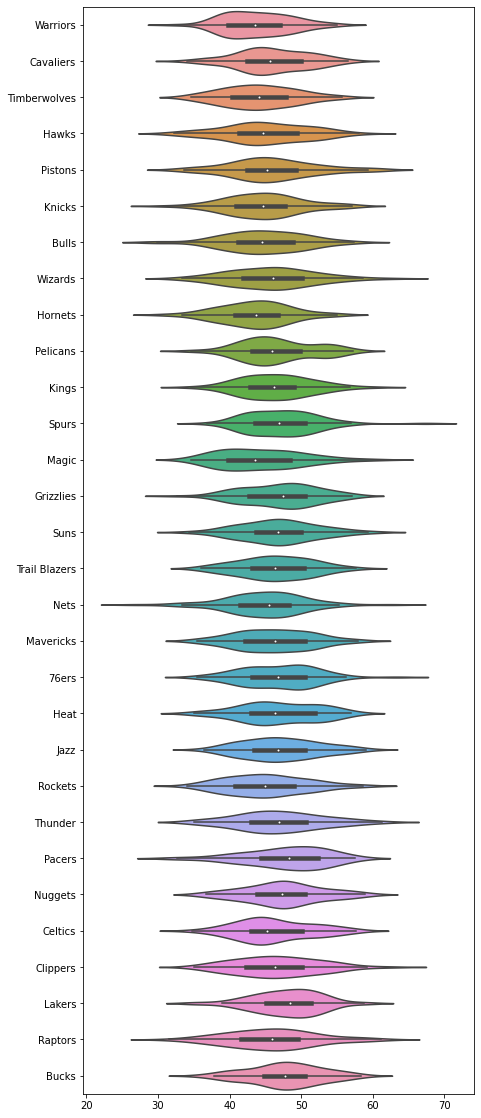

In [82]:
fig, ax = pyplot.subplots(figsize = (7, 20))
graph = seaborn.violinplot(data = fg_pct_df_sorted, orient = 'h')

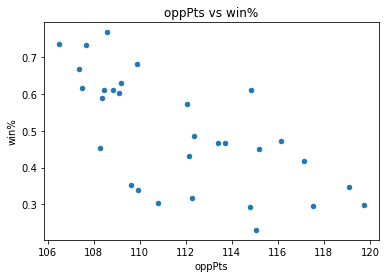

In [86]:
#what we did before, this time with opp pts
opp_df = pd.DataFrame()
for i in teams:
    column = db.loc[db.team == i]['oppPts'].reset_index(drop = True)
    add = pd.DataFrame({i: column})
    opp_df = pd.concat([opp_df, add], axis = 1)
opp_df_sorted = opp_df[sorted_index]
means = opp_df.mean()

temp = pd.concat([means.reset_index(), win_pct], axis = 1)
temp.columns = ['team', 'oppPts', 'win%']
temp.plot.scatter(x='oppPts',y='win%',title='oppPts vs win%')

-0.3154881082145538
-0.44454709673400755


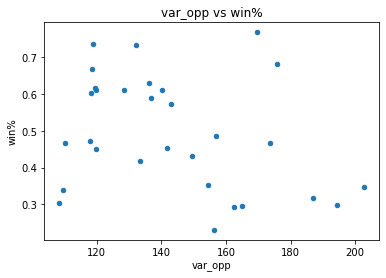

In [116]:
var = opp_df.var()
temp = pd.concat([var.reset_index(), win_pct], axis = 1)
temp.columns = ['team', 'var_opp', 'win%']
temp.plot.scatter(x='var_opp',y='win%',title='var_opp vs win%')
print(temp['var_opp'].corr(temp['win%']))
print(temp['var_opp'].corr(means.reset_index(drop = True)))

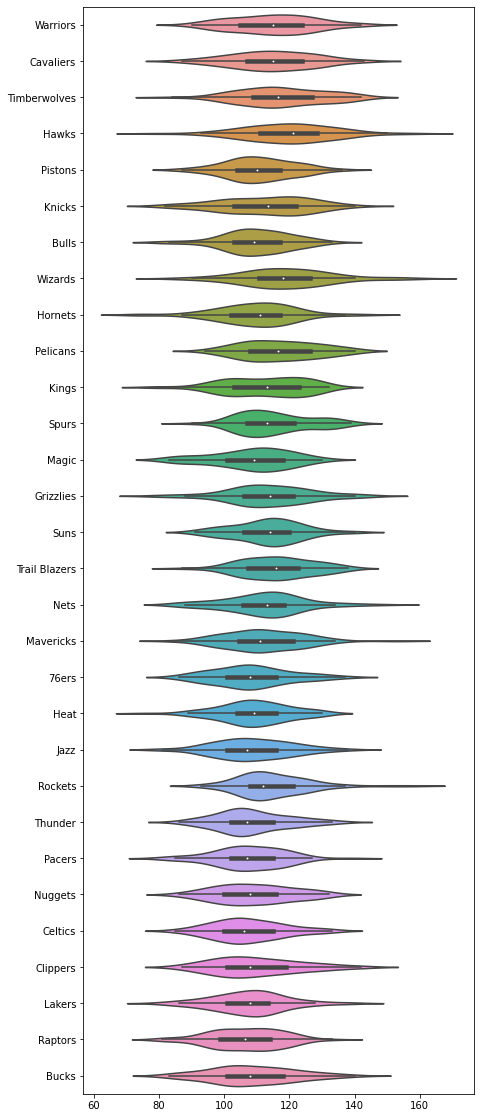

In [105]:
fig, ax = pyplot.subplots(figsize = (7, 20))
graph = seaborn.violinplot(data = opp_df_sorted, orient = 'h')

This project looked into how consistency affected winning. I looked at how FG%, 3P%, and Opponent Points (as a proxy for defense, as a proxy for effort) and their variances (measurement of consistency) affected Win% (winning). I came up with this idea thinking about how certain players, like Danny Green or JR Smith, are very streaky, hot and cold shooters, whereas other players are more consistent, but at the end of the season, they all only have one number for their percentage, which doesn't necessarily tell the full story. I wanted to see if a team with very consistent shooting and defense (as a proxy for effort) was any better than inconsistent teams. In a perfect world, you could add up the individual shooting variances and it would equal the team variance, so team variance would represent how consistent the players are.

Hypothesis: There is a correlation between consistency and winning. It could go either way, as more consistent teams know their best path to win, but less consistent teams would be harder to game plan for. I think more consistent teams will be better at winning.

Procedure: I scraped game log data for each team from Fox Sports. I used Pandas to put the data in a dataframe, calculate win pct, extract desired data and separate data for each team, sort the data by team win pct, calculate the variances of data and correlation of the variances with win pct, and visualize data.

Results: (correlation coefficients)
Var_3P vs Win%: - -0.10
Var_FG vs Win% - 0.14
Var_OppPts vs Win% - -0.32

Analysis: There was little to no correlation between the shooting variance/consistency and winning. Looking at the violin plots, we can also see that there was really no discernable pattern between higher variance and winning. Variance of opponent points had a low to moderate correlation with win %, meaning teams that consistently defended tended to win more. Curious about this, I went back and calculated the correlation between variance in opponent points and actual opponent points, and found it to be -0.44, an even stronger correlation, suggesting that more consistent teams tended to have better defenses, which makes sense considering more consistency would mean more consistent effort, which is a big part of defense.

One thing to consider is that if a team has a lot of good players who are streaky, they can assess who is hot and who is cold and play the hot shooter more minutes, similar to what the Lakers did last season (2020), thus mitigating negative effects of players' cold shooting, whereas other teams are without the option to go to a different player. Thus, the team variance may not necessarily represent its players' consistency game by game the way we want it to.

Future: take a look at individual players. Have a metric to rate whether they are consistent or not, and see which teams have the most/least consistent players, and see if the amount has any affect on winning.